In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./car_data/car_details_v4.csv')

In [4]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [5]:
cols = ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel_type','Transmission', 'Location', 'Color',
       'Owner', 'Seller_type', 'Engine', 'Max_power', 'Max_torque', 'Drivetrain','Length', 'Width', 'Height',
       'Seating_capacity', 'Fuel_tank_capacity']

In [6]:
df.columns = cols

In [7]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel_type,Transmission,Location,Color,Owner,Seller_type,Engine,Max_power,Max_torque,Drivetrain,Length,Width,Height,Seating_capacity,Fuel_tank_capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [8]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.00,825000.0,1925000.0,35000000.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.00,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.00,50000.0,72000.0,2000000.0
Length,1995.0,4.280861e+03,4.424585e+02,3099.0,3985.00,4370.0,4629.0,5569.0
Width,1995.0,1.767992e+03,1.352658e+02,1475.0,1695.00,1770.0,1831.5,2220.0
Height,1995.0,1.591735e+03,1.360740e+02,1165.0,1485.00,1545.0,1675.0,1995.0
Seating_capacity,1995.0,5.306266e+00,8.221701e-01,2.0,5.00,5.0,5.0,8.0
Fuel_tank_capacity,1946.0,5.200221e+01,1.511020e+01,15.0,41.25,50.0,60.0,105.0


In [9]:
df.describe(include='O').T

,count,unique,top,freq
Make,2059,33,Maruti Suzuki,440
Model,2059,1050,X1 sDrive20d xLine,15
Fuel_type,2059,9,Diesel,1049
Transmission,2059,2,Manual,1133
Location,2059,77,Mumbai,342
Color,2059,17,White,802
Owner,2059,6,First,1619
Seller_type,2059,3,Individual,1997
Engine,1979,108,1197 cc,231
Max_power,1979,335,89 bhp @ 4000 rpm,90


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel_type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller_type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max_power           1979 non-null   object 
 13  Max_torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [11]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel_type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller_type             0
Engine                 80
Max_power              80
Max_torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating_capacity       64
Fuel_tank_capacity    113
dtype: int64

In [405]:
#Replace the NAs or NaNs in the features by the mode of the feature

In [12]:
df['Engine'] = df['Engine'].fillna(df['Engine'].mode()[0])

In [13]:
df['Max_power'] = df['Max_power'].fillna(df['Max_power'].mode()[0])

In [14]:
df['Max_torque'] = df['Max_torque'].fillna(df['Max_torque'].mode()[0])

In [15]:
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])

In [16]:
df['Length'] = df['Length'].fillna(df['Length'].mode()[0])

In [17]:
df['Width'] = df['Width'].fillna(df['Width'].mode()[0])

In [18]:
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])

In [19]:
df['Seating_capacity'] = df['Seating_capacity'].fillna(df['Seating_capacity'].mode()[0])

In [20]:
df['Fuel_tank_capacity'] = df['Fuel_tank_capacity'].fillna(df['Fuel_tank_capacity'].mode()[0])

In [21]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel_type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller_type           0
Engine                0
Max_power             0
Max_torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating_capacity      0
Fuel_tank_capacity    0
dtype: int64

In [22]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel_type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller_type', 'Engine',
       'Max_power', 'Max_torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating_capacity', 'Fuel_tank_capacity'],
      dtype='object')

# Levels of measurements

# Make: nominal, Model: nominal, Price: ratio, Year: interval, Kilometer: ratio, Fuel_type: nominal, Transmission: nominal, Location: nominal, Color: nominal, Owner: ordinal, Seller_type: nominal, Engine: ratio, Max_power: ratio,
# Max_torque: ratio, Drivetrain: nominal, Length: ratio, Width: ratio, Height: ratio, Seating_capacity: interval,
# Fuel_tank_capacity: ratio

In [23]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [406]:
# Convert the torque feqture and hp feature to a numeric feature and use them in modeling

In [24]:
Engine_f = [int(val.split()[0]) for val in list(df['Engine'])]

In [25]:
df['Engine_f'] = Engine_f

In [26]:
Engine_hp = [float(re.split(r' |@',val)[0]) for val in list(df['Max_power'])]

In [27]:
df['Engine_hp'] = Engine_hp

In [28]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel_type,Transmission,Location,Color,Owner,...,Max_power,Max_torque,Drivetrain,Length,Width,Height,Seating_capacity,Fuel_tank_capacity,Engine_f,Engine_hp
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,1198,87.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,1248,74.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1197,79.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,1197,82.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,2393,148.0


In [29]:
corr = df.corr()

<AxesSubplot:>

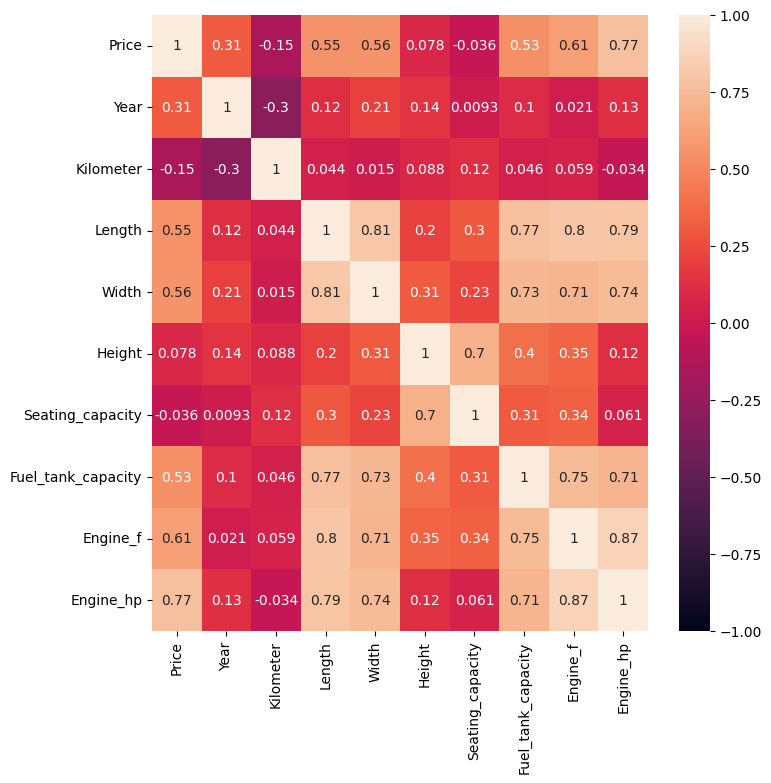

In [30]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

In [407]:
# log transform the Prices (target for prediction) so that it follows a normal distribution

In [31]:
Y_lin = df['Price'].copy()

In [32]:
Y_log = np.log(Y_lin)

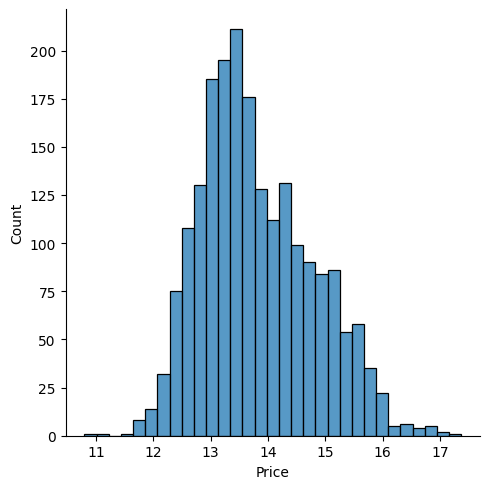

In [33]:
sns.displot(Y_log)

In [34]:
X = df.drop(columns=['Engine', 'Price', 'Max_power', 'Max_torque'])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_log, random_state=42)

In [37]:
X_train.columns

Index(['Make', 'Model', 'Year', 'Kilometer', 'Fuel_type', 'Transmission',
       'Location', 'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating_capacity', 'Fuel_tank_capacity', 'Engine_f',
       'Engine_hp'],
      dtype='object')

In [38]:
# Encode categorical variables 

In [39]:
from category_encoders import *
from sklearn.preprocessing import LabelEncoder

In [40]:
def encode_categorical_features(X_categ_train, X_categ_test, y_train, encoder, Target_based=False):
    if Target_based:
        X_encoded_train = encoder.fit_transform(X_categ_train,y_train)
        X_encoded_test = encoder.transform(X_categ_test)
    else:
        X_encoded_train = encoder.fit_transform(X_categ_train)
        X_encoded_test = encoder.transform(X_categ_test)
    
    return X_encoded_train, X_encoded_test

In [41]:
owner_enc_map = {'UnRegistered Car':0,'First':1, 'Second':2,'Third':3, 'Fourth':4, '4 or More':5}
seating_cpty_map = {'2.0':0,'4.0':1,'5.0':2,'6.0':3,'7.0':4,'8.0':5}
drivetrain_map = {'FWD':0, 'RWD':1, 'AWD':2}
transmisson_map = {'Manual':0, 'Automatic':1}

In [42]:
X_train['Year'] = X_train['Year'].apply(int)
X_test['Year'] = X_test['Year'].apply(int)

In [43]:
X_train['Seating_capacity'] = X_train['Seating_capacity'].apply(str)
X_test['Seating_capacity'] = X_test['Seating_capacity'].apply(str)

In [44]:
enc_target = TargetEncoder(cols=['Make','Location','Color','Seller_type','Fuel_type'], min_samples_leaf=30, smoothing=20) # Target based
enc_ohe = OneHotEncoder() # Not Target based
enc_sum = SumEncoder() #Target based
enc_catboost = CatBoostEncoder(cols=['Model'], sigma=10.0, a=5) #Target based
enc_label = LabelEncoder() # Not Target based
enc_ordinal = OrdinalEncoder(cols=['Owner','Seating_capacity', 'Transmission','Drivetrain'], mapping=[{'col':'Owner', 'mapping':owner_enc_map},{'col':'Seating_capacity'
                                                                                                                   , 'mapping': seating_cpty_map}, {'col':'Drivetrain', 'mapping':drivetrain_map},
                                                                                                            {'col':'Transmission', 'mapping':transmisson_map}]) # Not Target based

enc_count = CountEncoder(cols=['Model'],handle_unknown=1)
enc_target1 = TargetEncoder(cols=['Model'],min_samples_leaf=20, smoothing=1000 )
enc_hash = HashingEncoder(cols=['Model'])

In [45]:
X_train_tr1, X_test_tr1 = encode_categorical_features(X_train, X_test,y_train,enc_target, Target_based=True)

In [46]:
X_train_tr, X_test_tr = encode_categorical_features(X_train_tr1, X_test_tr1,y_train,enc_ordinal)

In [50]:
X_train_tr = X_train_tr.drop(columns=['Model'])
X_test_tr = X_test_tr.drop(columns=['Model'])

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def calculate_VIF(X_numeric):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X_numeric.columns
    vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]
    
    return vif_data

In [53]:
vif = calculate_VIF(X_train_tr)
print(vif)

               feature           VIF
0                 Make   1363.386879
1                 Year  42343.522289
2            Kilometer      1.982608
3            Fuel_type   2883.320545
4         Transmission      3.580524
5             Location   3719.621687
6                Color   2235.329459
7                Owner      7.158660
8          Seller_type  31108.213482
9           Drivetrain      3.981445
10              Length    573.219162
11               Width    751.367393
12              Height    475.528275
13    Seating_capacity     25.242363
14  Fuel_tank_capacity     43.931110
15            Engine_f     61.514958
16           Engine_hp     50.813665


In [54]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [55]:
# start building models

In [416]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import QuantileRegressor, Lasso, Ridge, RANSACRegressor
from sklearn.model_selection import cross_validate, cross_val_predict

In [57]:
scale = StandardScaler()
scale1 = MinMaxScaler()

In [254]:
def predict_model_performance(fitted_model,X_train,X_test,y_train,y_test,performance_measure):
    y_pred = fitted_model.predict(X_test)
    y_train_pred = fitted_model.predict(X_train)
    
    for score in performance_measure:
        perfromance_test = score(y_test,y_pred)
        perfromance_train = score(y_train,y_train_pred)
        
        diff_metric = abs(perfromance_train - perfromance_test)
        rel_diff_metric = diff_metric/abs(perfromance_train)
        percent_diff = rel_diff_metric*100.0
        
        print('The testing "{}" of the model is {}'.format(score.__name__,perfromance_test))
        print('The training "{}" of the model is {}'.format(score.__name__,perfromance_train))
        print('The percentage difference between train and test {} is {:.4}%'.format(score.__name__, percent_diff))
        

In [141]:
def compute_rel_percent_diff(metric_train, metric_test):
    diff_metric = abs(metric_train - metric_test)
    rel_diff_metric = diff_metric/abs(metric_train)
    percent_diff = rel_diff_metric*100.0
    
    return percent_diff

In [59]:
from sklearn.model_selection import learning_curve

In [60]:
def plot_learning_curve(model, X_train, y_train, cv, metric, train_sizes):
    train_size_abs, train_scores, test_scores = learning_curve(model,X_train,y_train,cv=cv
                                                               ,scoring=metric,train_sizes=train_sizes)
    
    metric_name = metric.split('_')[0]
    
    metric_name_join = ' '.join(metric.split('_')[1:]).title()
    if metric_name == 'neg':
        train_scores_avg = (train_scores.mean(axis=1))*(-1)
        test_scores_avg = (test_scores.mean(axis=1))*(-1)
    
    fig,ax=plt.subplots()
    ax.plot(train_size_abs, train_scores_avg, marker="o",color="red")
    ax.set_xlabel("Training set size")
    ax.set_ylabel(metric_name_join)
    ax.plot(train_size_abs, test_scores_avg , marker="o", color="green")
    ax.legend(["Training" , "Validation"])
    plt.show()

In [61]:
train_sizes = [0.1, 0.2, 0.3, 0.5, 0.6,0.7,0.8,0.85,0.9,0.95,1.0]

In [62]:
import statsmodels.api as sm

In [63]:
X_train_tr_scl = scale1.fit_transform(X_train_tr)

In [64]:
X_test_tr_scl = scale1.transform(X_test_tr)

In [65]:
X_train_tr_scl = sm.add_constant(X_train_tr_scl)

In [66]:
model1 = sm.OLS(y_train, X_train_tr_scl)

In [67]:
results1 = model1.fit()

In [68]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     891.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:03:25   Log-Likelihood:                -315.18
No. Observations:                1544   AIC:                             666.4
Df Residuals:                    1526   BIC:                             762.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2110      0.090    101.990      0.0

In [69]:
X_train_tr.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel_type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length', 'Width',
       'Height', 'Seating_capacity', 'Fuel_tank_capacity', 'Engine_f',
       'Engine_hp'],
      dtype='object')

In [70]:
X_train_filter1 = X_train_tr.drop(columns=['Engine_f','Fuel_tank_capacity','Seating_capacity','Width'])

In [71]:
X_test_filter1 = X_test_tr.drop(columns=['Engine_f','Fuel_tank_capacity','Seating_capacity','Width'])

In [72]:
X_train_tr_scl1 = scale1.fit_transform(X_train_filter1)

In [73]:
X_test_tr_scl1 = scale1.transform(X_test_filter1)

In [74]:
X_train_tr_scl1 = sm.add_constant(X_train_tr_scl1)

In [75]:
model2 = sm.OLS(y_train, X_train_tr_scl1)

In [76]:
results2 = model2.fit()

In [77]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1159.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:04:20   Log-Likelihood:                -321.48
No. Observations:                1544   AIC:                             671.0
Df Residuals:                    1530   BIC:                             745.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1719      0.089    102.798      0.0

In [78]:
X_train_filter1.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel_type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length', 'Height',
       'Engine_hp'],
      dtype='object')

In [79]:
X_train_filter2 = X_train_filter1.drop(columns=['Height'])

In [80]:
X_test_filter2 = X_test_filter1.drop(columns=['Height'])

In [81]:
X_train_tr_scl2 = scale1.fit_transform(X_train_filter2)

In [82]:
X_test_tr_scl2 = scale1.transform(X_test_filter2)

In [83]:
X_train_tr_scl2 = sm.add_constant(X_train_tr_scl2)

In [84]:
model3 = sm.OLS(y_train, X_train_tr_scl2)

In [85]:
results3 = model3.fit()

In [86]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1252.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:05:18   Log-Likelihood:                -323.42
No. Observations:                1544   AIC:                             672.8
Df Residuals:                    1531   BIC:                             742.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1983      0.088    104.195      0.0

In [87]:
X_train_filter2.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel_type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length', 'Engine_hp'],
      dtype='object')

In [143]:
X_train_filter3 = X_train_filter2.drop(columns=['Color','Seller_type','Fuel_type', 'Kilometer'])

In [144]:
X_test_filter3 = X_test_filter2.drop(columns=['Color','Seller_type','Fuel_type', 'Kilometer'])

In [167]:
X_train_tr_scl3 = scale1.fit_transform(X_train_filter3)

In [168]:
X_test_tr_scl3 = scale1.transform(X_test_filter3)

In [147]:
X_train_tr_scl3 = sm.add_constant(X_train_tr_scl3)

In [148]:
model4 = sm.OLS(y_train, X_train_tr_scl3)

In [149]:
results4 = model4.fit()

In [150]:
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1770.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:28:59   Log-Likelihood:                -366.75
No. Observations:                1544   AIC:                             751.5
Df Residuals:                    1535   BIC:                             799.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1681      0.086    107.217      0.0

In [117]:
vif = calculate_VIF(X_train_filter3)
print(vif)

        feature          VIF
0          Make  1213.952142
1          Year  6252.151648
2     Kilometer     1.965631
3     Fuel_type  2493.287544
4  Transmission     3.429659
5      Location  3681.063851
6         Owner     6.911287
7    Drivetrain     2.618050
8        Length   330.409364
9     Engine_hp    20.373475


In [151]:
X_train_filter3.columns

Index(['Make', 'Year', 'Transmission', 'Location', 'Owner', 'Drivetrain',
       'Length', 'Engine_hp'],
      dtype='object')

In [408]:
# Perform residual diagnostics for linear regression assumptions

In [116]:
from scipy import stats

((array([-3.32078159, -3.06469936, -2.92235802, ...,  2.92235802,
          3.06469936,  3.32078159]),
  array([-1.25126691, -1.2473819 , -1.22128794, ...,  1.84942372,
          1.92875343,  2.37526623])),
 (0.2937691986647627, -5.972880582593189e-15, 0.9555661619421061))

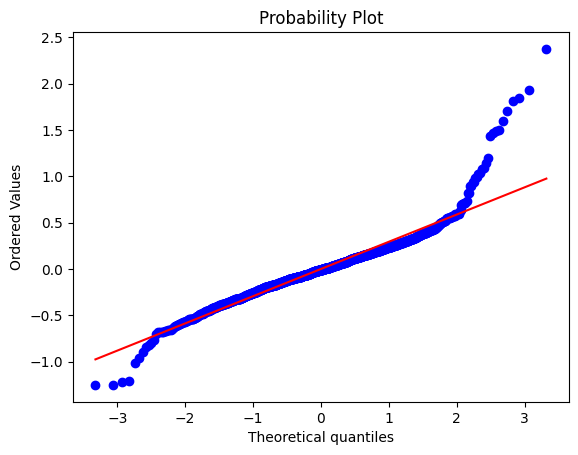

In [152]:
stats.probplot(results4.resid,plot=plt)

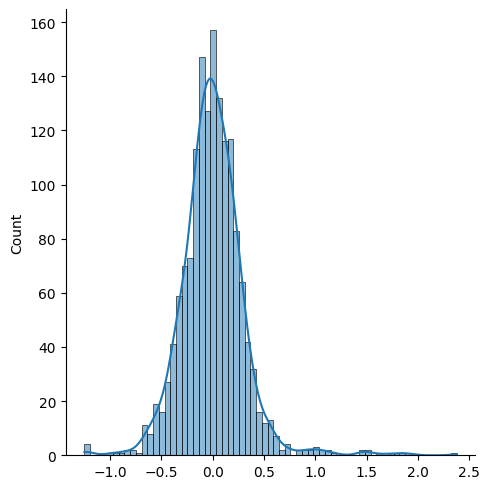

In [153]:
sns.displot(results4.resid,kde=True)

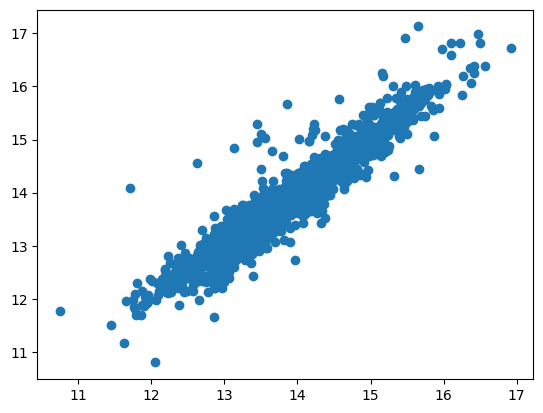

In [154]:
plt.scatter(results4.fittedvalues, y_train)

eval_env: 1


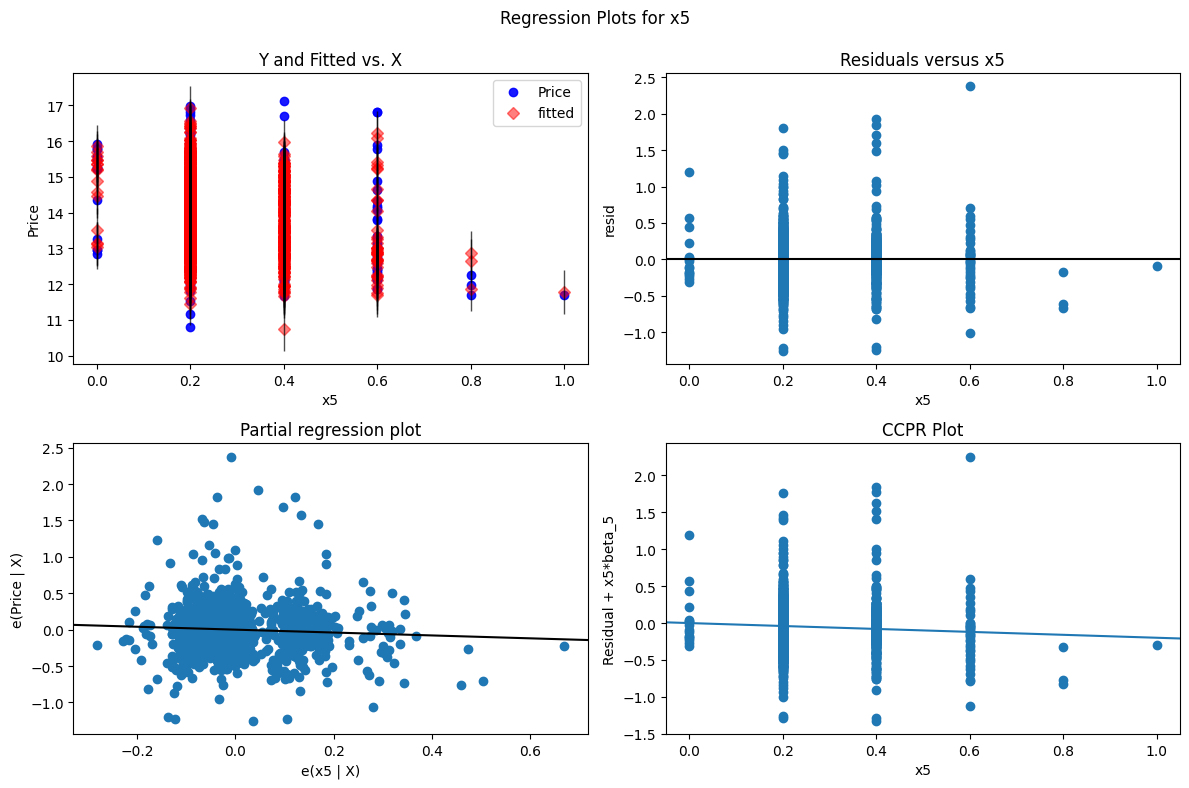

In [155]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(results4, 'x5', fig=fig)
plt.show()

In [433]:
influence = results4.get_influence()

In [435]:
inf_sum = influence.summary_frame()

In [436]:
print(inf_sum.head())

      dfb_const    dfb_x1    dfb_x2    dfb_x3    dfb_x4    dfb_x5    dfb_x6  \
439    0.091516 -0.017027 -0.071430 -0.005581 -0.002035 -0.047245  0.010490   
271    0.007671 -0.005651  0.000290  0.012758 -0.012366 -0.019034  0.004259   
244   -0.008189  0.005018  0.010494  0.007190 -0.007847  0.006775  0.002832   
998   -0.056249  0.137682  0.073265 -0.060194 -0.056159  0.047744 -0.127806   
1851  -0.000207  0.041742 -0.008453 -0.055824  0.053500  0.007130  0.010446   

        dfb_x7    dfb_x8   cooks_d  standard_resid  hat_diag  dffits_internal  \
439  -0.040177  0.021655  0.001411        1.943981  0.003350         0.112700   
271  -0.013524  0.013027  0.000126       -0.500229  0.004518        -0.033699   
244  -0.005727 -0.002583  0.000043       -0.323540  0.003689        -0.019686   
998  -0.034418  0.004479  0.004304       -1.690471  0.013374        -0.196818   
1851 -0.029161  0.006810  0.000792       -0.936397  0.008062        -0.084417   

      student_resid    dffits  
439   

In [437]:
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

<AxesSubplot:>

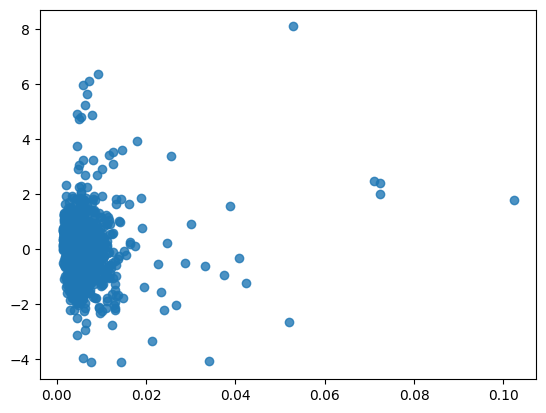

In [440]:
sns.regplot(x=leverage, y =student_resid, fit_reg=False)

In [451]:
MEDVres = pd.concat([y_train, inf_sum], axis = 1)
MEDVres=MEDVres.rename(columns={'hat_diag': 'leverage'})
MEDVres.shape

(1544, 16)

In [446]:
r = MEDVres.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = MEDVres.sort_values(by = 'student_resid')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    1544.000000
mean        0.000547
std         1.005907
min        -4.117001
25%        -0.553451
50%        -0.025764
75%         0.507480
max         8.095801
Name: student_resid, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
          Price  dfb_const    dfb_x1    dfb_x2    dfb_x3    dfb_x4    dfb_x5  \
491   10.799576  -0.320022 -0.132164  0.229820  0.038384 -0.081778  0.139454   
2004  12.721886  -0.176107 -0.121692  0.221624 -0.047397  0.063930 -0.041594   
1768  14.444119  -0.223605  0.067355  0.212406  0.091353  0.093428  0.154703   
459   11.652679  -0.020911 -0.025300  0.040251  0.043270  0.154492 -0.115366   
575   14.316286   0.069958  0.005972 -0.001143  0.053518  0.049961 -0.257949   

        dfb_x6    dfb_x7    dfb_x8   cooks_d  standard_resid  leverage  \
491  -0.238113  0.295358  0.035706  0.027469       -4.095777  0.

In [456]:
#Print all MEDV values where the studentized residuals exceed 2
print (MEDVres.Price[abs(r) > 2])

582     16.906553
1151    15.093663
43      14.690979
727     14.790070
506     12.388394
879     14.946913
575     14.316286
557     12.676076
1278    14.978661
1087    15.201805
1549    12.128111
147     15.297115
1052    16.012735
296     14.444119
695     13.071070
171     12.323856
319     12.254863
1608    13.071070
846     13.527828
1305    17.129697
2004    12.721886
388     12.201060
235     15.068274
94      15.176487
33      13.664688
1046    14.557448
491     10.799576
1680    12.429216
1042    15.009433
977     16.705882
456     14.213615
114     12.959844
604     15.067988
1246    16.811243
1002    13.623139
1077    15.294840
837     15.663965
1859    11.775290
920     12.196022
853     13.422468
1535    13.422468
1907    12.206073
1250    13.112313
246     13.652992
1533    15.768538
1520    15.607270
1928    15.096444
1768    14.444119
1821    11.982929
1678    14.285514
642     15.024471
1275    16.204273
995     14.077875
729     14.845130
1154    16.257858
747     14

In [452]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (11)
#n = number of observations (506)
((2*8)+2)/1544 #=0.011658031088082901 any numbner higher than this is high leverage
l = MEDVres.leverage

print ('-'*30 + ' Leverage ' + '-'*30)
print (l.describe())
print ('\n')

l_sort = MEDVres.sort_values(by = 'leverage', ascending = False)
print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (l_sort.head())

------------------------------ Leverage ------------------------------
count    1544.000000
mean        0.005829
std         0.005532
min         0.001349
25%         0.003639
50%         0.004917
75%         0.006590
max         0.102277
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
          Price  dfb_const    dfb_x1    dfb_x2    dfb_x3    dfb_x4    dfb_x5  \
510   16.993564   0.077790 -0.123019 -0.031819 -0.067887  0.013447 -0.046850   
1246  16.811243  -0.034211 -0.190143 -0.035213 -0.083382  0.026969  0.178636   
1369  16.811243  -0.044907 -0.156453 -0.012648 -0.072388  0.027527  0.155364   
977   16.705882   0.065068 -0.187199 -0.079694 -0.060720 -0.074687  0.039977   
995   14.077875   1.315187  0.130422 -1.670043  0.238643  0.043625 -0.020490   

        dfb_x6    dfb_x7    dfb_x8   cooks_d  standard_resid  leverage  \
510  -0.087101 -0.366203  0.579427  0.039712        1.771176  0.102277   
12

In [454]:
#point with leverage = (2k+2)/n = 0.011658031088082901
#Print all MEDV values where the leverage exceeds 0.011658031088082901
print (MEDVres.Price[abs(l) > ((2*8)+2)/1544])

998     13.681979
1936    12.128111
575     14.316286
2023    13.507626
442     16.733281
          ...    
1369    16.811243
1154    16.257858
699     12.323856
510     16.993564
1437    12.847927
Name: Price, Length: 70, dtype: float64


In [462]:
#large residual and large leverage = INFLUENTIAL
#Print values that are both outliers and influential
outlier=pd.DataFrame((MEDVres.Price[abs(r) > 2]))
lev= pd.DataFrame((MEDVres.Price[abs(l) > ((2*8)+2)/1544]))

#Influential1=pd.merge(outlier,lev, left_index=True, right_index=True, how='outer')
#print(Influential1)

Influential2=pd.merge(outlier,lev, left_index=True, right_index=True)
print(Influential2.index)

Int64Index([ 575,  147,  319, 1608,  846,  235,   94,  491,  977, 1246, 1002,
            1859, 1907, 1533, 1768, 1821, 1275,  995, 1154],
           dtype='int64')


In [461]:
#Cook's D of more than 3 times the mean is a possible outlier
#MEDVres.loc[:,"cooks_d"].mean()
cutoff=(MEDVres.loc[:,"cooks_d"].mean())*3
outlier2=pd.DataFrame((MEDVres.Price[abs(MEDVres.cooks_d) > cutoff]))
print(outlier2.index)

Int64Index([ 998,  582, 1151,   43,  727,  879,  575,  557, 1278, 1087, 1549,
             214,  147,  528,  296,  695,  477,  164,  319, 1608,  846,  424,
             793, 1305, 2004, 1673,  388,  235,   94, 1046,  868, 1035,  491,
            1680, 1042,  977,  604, 1246, 1766, 1002, 1077,  837, 1859,  245,
             853, 1535, 1907, 1250,  835, 1533, 1928, 1768,  972, 1821,   95,
             642, 1275,  995, 1579,  729, 1025, 1369, 1154,  699,  510,  747,
             459],
           dtype='int64')


In [463]:
#Remove influential observations and rerun regression
X_train_alt=X_train_filter3.drop(Influential2.index)
y_train_alt=y_train.drop(Influential2.index)

#Remove influential observations and rerun regression
X_train_alt2=X_train_filter3.drop(outlier2.index)
y_train_alt2=y_train.drop(outlier2.index)

In [464]:
X_train_alt_scl = scale1.fit_transform(X_train_alt)
X_train_alt2_scl = scale1.fit_transform(X_train_alt2)

In [465]:
cross_validation_linreg = cross_validate(lin_reg, X_train_alt_scl, y_train_alt, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [466]:
print(cross_validation_linreg['test_neg_mean_absolute_error'].mean())

-0.206747989561068


In [467]:
print(cross_validation_linreg['train_neg_mean_absolute_error'].mean())

-0.20479071933760357


In [468]:
np.mean(cross_validation_linreg['test_r2'])

0.9108921084397263

In [469]:
np.mean(cross_validation_linreg['train_r2'])

0.9129529110033857

In [470]:
cross_validation_linreg_t1 = cross_validate(lin_reg, X_train_alt2_scl, y_train_alt2, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [471]:
np.mean(cross_validation_linreg_t1['test_r2'])

0.9400032556582895

In [472]:
np.mean(cross_validation_linreg_t1['train_r2'])

0.9415204764586905

In [473]:
print(cross_validation_linreg_t1['test_neg_mean_absolute_error'].mean())

-0.18127957422216204


In [474]:
print(cross_validation_linreg_t1['train_neg_mean_absolute_error'].mean())

-0.17974843202867719


In [475]:
t_test_linreg_t1 = ttest_ind(cross_validation_linreg_t1['test_neg_mean_absolute_error'],cross_validation_linreg_t1['train_neg_mean_absolute_error'])

In [476]:
t_test_linreg_t1

(-0.6837926033910117, 0.5028147369325376, 18.0)

In [479]:
y_pred_cv_t1 = cross_val_predict(lin_reg,X_train_alt2_scl, y_train_alt2, cv=10, n_jobs=-1)

<AxesSubplot:xlabel='Price'>

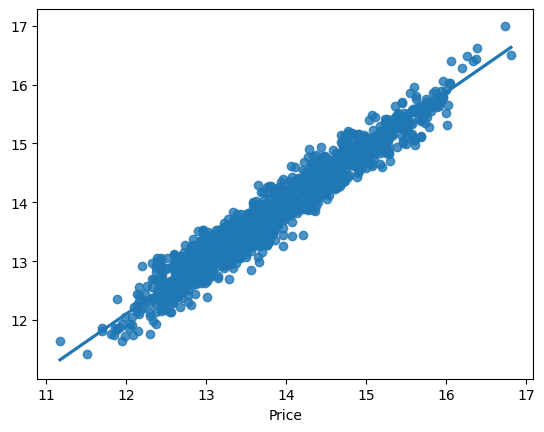

In [480]:
sns.regplot(x=y_train_alt2, y=y_pred_cv_t1)

In [499]:
lin_reg = LinearRegression()

In [170]:
cross_validation_linreg = cross_validate(lin_reg, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [425]:
cross_validation_linreg_t = cross_validate(lin_reg, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_squared_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [426]:
np.mean(cross_validation_linreg_t['test_r2'])

0.900566840875662

In [427]:
print(cross_validation_linreg_t['test_neg_mean_squared_error'].mean())

-0.09606313571757401


In [428]:
print(cross_validation_linreg_t['train_neg_mean_squared_error'].mean())

-0.09405853954026482


In [171]:
cross_validation_linreg.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_r2', 'train_r2', 'test_neg_mean_absolute_error', 'train_neg_mean_absolute_error'])

In [172]:
np.mean(cross_validation_linreg['test_r2'])

0.900566840875662

In [173]:
np.mean(cross_validation_linreg['train_r2'])

0.9023186060219139

In [174]:
print(cross_validation_linreg['test_neg_mean_absolute_error'].mean())

-0.21628484784766133


In [175]:
print(cross_validation_linreg['train_neg_mean_absolute_error'].mean())

-0.21466071315197585


In [411]:
# Perform a independent t-test to confirm whether the means of the cross validated scores of training 
# and validation sets of different splits are same or different. The test will confirm if the train and validation
# scores are same. This will further confirm presence of overfitting or underfitting.
# null hypothesis: the means of the two indpendent samples are same
# alternative hypothesis: the means are different 

In [410]:
from statsmodels.stats.weightstats import ttest_ind

In [477]:
t_test_linreg = ttest_ind(cross_validation_linreg['test_neg_mean_absolute_error'],cross_validation_linreg['train_neg_mean_absolute_error'])

In [478]:
t_test_linreg

(-0.40569117700673407, 0.6897512911762371, 18.0)

In [412]:
# The t-test p value (0.7936428) is higher than 0.05. This indicates that the null hypothesis can not be rejected. 

In [265]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_linreg['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_linreg['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 0.7566%


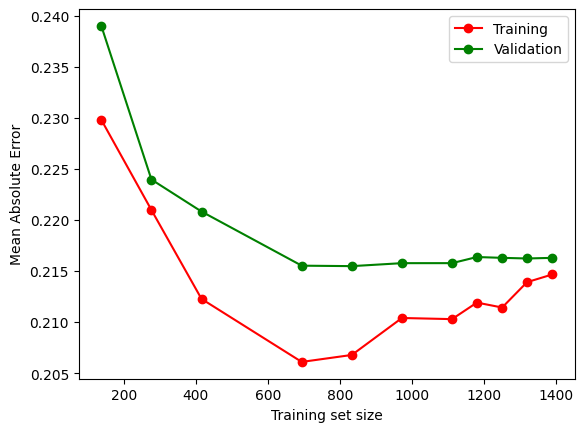

In [177]:
plot_learning_curve(lin_reg, X_train_tr_scl3, y_train, 10, 'neg_mean_absolute_error', train_sizes)

In [500]:
lin_reg.fit(X_train_alt2_scl, y_train_alt2)

LinearRegression()

In [502]:
y_pred = lin_reg.predict(X_test_tr_scl3)

<AxesSubplot:xlabel='Price'>

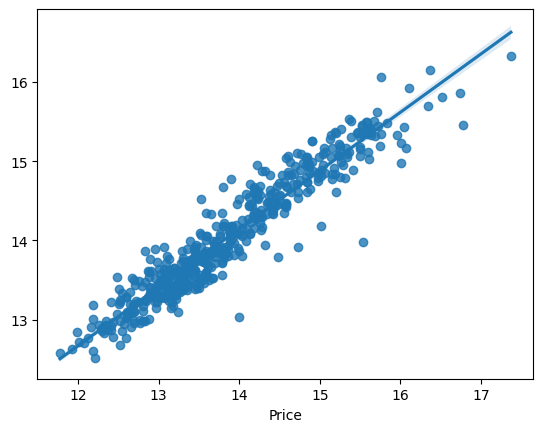

In [503]:
sns.regplot(x=y_test,y=y_pred)

In [417]:
y_pred_cv = cross_val_predict(lin_reg,X_train_tr_scl3,y_train, cv=10, n_jobs=-1)

<AxesSubplot:xlabel='Price'>

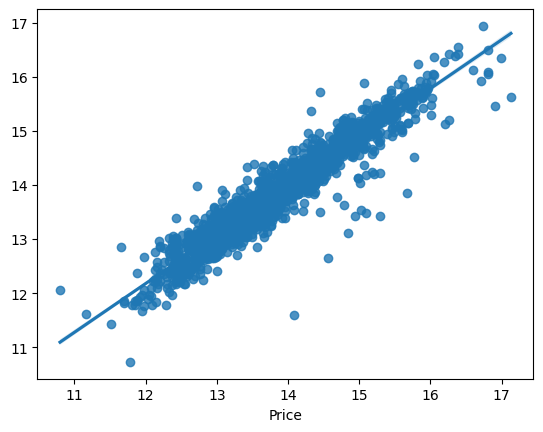

In [418]:
sns.regplot(x=y_train,y=y_pred_cv)

In [266]:
predict_model_performance(lin_reg,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9119976860373196
The training "r2_score" of the model is 0.9022136585793137
The percentage difference between train and test r2_score is 1.084%
The testing "mean_absolute_error" of the model is 0.20348435645112062
The training "mean_absolute_error" of the model is 0.2146789081333087
The percentage difference between train and test mean_absolute_error is 5.215%


In [501]:
predict_model_performance(lin_reg,X_train_alt2_scl,X_test_tr_scl3,y_train_alt2,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.8387336274685149
The training "r2_score" of the model is 0.9414762918166237
The percentage difference between train and test r2_score is 10.91%
The testing "mean_absolute_error" of the model is 0.31112972996035576
The training "mean_absolute_error" of the model is 0.17978376162806564
The percentage difference between train and test mean_absolute_error is 73.06%


In [322]:
ransac_reg = RANSACRegressor()  

In [324]:
cross_validation_ransac = cross_validate(ransac_reg, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [429]:
cross_validation_ransac_t = cross_validate(ransac_reg, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_squared_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [430]:
np.mean(cross_validation_ransac_t['test_neg_mean_squared_error'])

-0.1041218007149138

In [431]:
np.mean(cross_validation_ransac_t['train_neg_mean_squared_error'])

-0.10588245667274343

In [325]:
np.mean(cross_validation_ransac['test_r2'])

0.890121844445026

In [326]:
np.mean(cross_validation_ransac['train_r2'])

0.8916322268524622

In [327]:
np.mean(cross_validation_ransac['test_neg_mean_absolute_error'])

-0.22352684543354165

In [328]:
np.mean(cross_validation_ransac['train_neg_mean_absolute_error'])

-0.22148772287527013

In [329]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_ransac['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_ransac['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 0.9206%


In [181]:
lasso = LassoCV()

In [182]:
cross_validation_lasso = cross_validate(lasso, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [301]:
cross_validation_lasso.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_r2', 'train_r2', 'test_neg_mean_absolute_error', 'train_neg_mean_absolute_error'])

In [333]:
np.mean(cross_validation_lasso['test_r2'])

0.900521465825344

In [334]:
np.mean(cross_validation_lasso['train_r2'])

0.9022915293104419

In [335]:
np.mean(cross_validation_lasso['test_neg_mean_absolute_error'])

-0.21635968661337374

In [336]:
np.mean(cross_validation_lasso['train_neg_mean_absolute_error'])

-0.21473936441973449

In [319]:
t_test_lasso = ttest_ind(cross_validation_lasso['test_r2'],cross_validation_lasso['train_r2'])

In [320]:
t_test_lasso

(-0.20608324267637568, 0.8390388609854579, 18.0)

In [312]:
rel_diff = compute_rel_percent_diff(np.std(cross_validation_lasso['train_neg_mean_absolute_error']),
                                    np.std(cross_validation_lasso['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.10}%'.format(rel_diff))

The percentage difference of train and test score is: 703.9949987%


In [263]:
lasso.fit(X_train_tr_scl3,y_train)

LassoCV()

In [330]:
lasso.alpha_

0.00031899941193980604

In [264]:
predict_model_performance(lasso,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9118808352857755
The training "r2_score" of the model is 0.9021866230348304
The percentage difference between train and test r2_score is 1.075%
The testing "mean_absolute_error" of the model is 0.20353914398944334
The training "mean_absolute_error" of the model is 0.21474597238482018
The percentage difference between train and test mean_absolute_error is 5.219%


In [267]:
lasso_reg = Lasso(random_state=1234)

In [277]:
params = {'alpha': [0.01,0.02, 0.05, 0.1, 0.5, 0.8, 1, 5, 10, 15]}

In [278]:
rscv0 = RandomizedSearchCV(estimator=lasso_reg,param_distributions=params, cv=5, 
                          scoring=['r2','neg_mean_absolute_error'],n_jobs=-1,
                         refit='neg_mean_absolute_error',return_train_score=True,
                          random_state=1234)

In [279]:
rscv0.fit(X_train_tr_scl3, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(random_state=1234), n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5,
                                                  0.8, 1, 5, 10, 15]},
                   random_state=1234, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['r2', 'neg_mean_absolute_error'])

In [280]:
rscv0.best_params_

{'alpha': 0.01}

In [294]:
(rscv0.cv_results_['mean_test_r2'])

array([ 0.87859104,  0.82495664,  0.6271044 ,  0.53803935, -0.00566154,
       -0.00566154, -0.00566154, -0.00566154, -0.00566154, -0.00566154])

In [286]:
np.mean(rscv0.cv_results_['mean_train_r2'])

0.2878739057637932

In [284]:
predict_model_performance(rscv0,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.8879574635309835
The training "r2_score" of the model is 0.8802532778814047
The percentage difference between train and test r2_score is 0.8752%
The testing "mean_absolute_error" of the model is 0.2345255733488332
The training "mean_absolute_error" of the model is 0.24291655647493746
The percentage difference between train and test mean_absolute_error is 3.454%


In [291]:
y_pred0 = rscv0.predict(X_test_tr_scl3)

<AxesSubplot:xlabel='Price'>

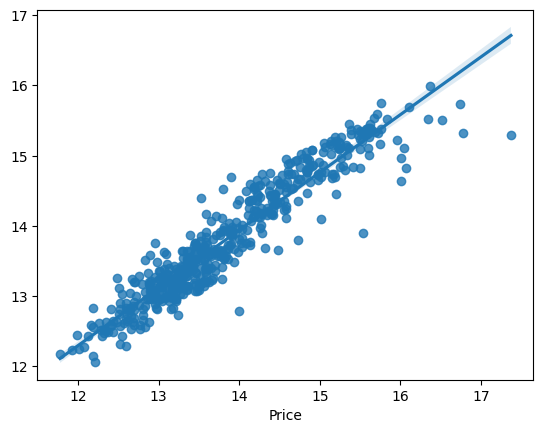

In [293]:
sns.regplot(x=y_test, y=y_pred0)

In [287]:
gscv0 = GridSearchCV(estimator=lasso_reg, param_grid=params, scoring=['r2','neg_mean_absolute_error'], 
                    return_train_score=True, n_jobs=-1, refit='neg_mean_absolute_error',cv=5)

In [288]:
gscv0.fit(X_train_tr_scl3, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=1234), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.8, 1, 5, 10,
                                   15]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'])

In [290]:
gscv0.best_params_

{'alpha': 0.01}

In [289]:
np.mean(gscv0.cv_results_['mean_test_r2'])

0.2834722220037133

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [481]:
rf = RandomForestRegressor(random_state=1234)

In [482]:
cross_validation_rf_t = cross_validate(rf, X_train_alt2_scl, y_train_alt2, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [483]:
np.mean(cross_validation_rf_t['test_r2'])

0.9642984655606721

In [484]:
np.mean(cross_validation_rf_t['train_r2'])

0.9947040498372637

In [496]:
t_test_rf_t = ttest_ind(cross_validation_rf_t['train_neg_mean_absolute_error'],cross_validation_rf_t['test_neg_mean_absolute_error'])

In [497]:
t_test_rf_t

(26.212164949188185, 8.642585864686759e-16, 18.0)

In [192]:
cross_validation_rf = cross_validate(rf, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [193]:
np.mean(cross_validation_rf['test_r2'])

0.9468153087400782

In [194]:
np.mean(cross_validation_rf['train_r2'])

0.9921057317599781

In [485]:
np.mean(cross_validation_rf_t['test_neg_mean_absolute_error'])

-0.132969014228836

In [487]:
np.mean(cross_validation_rf_t['train_neg_mean_absolute_error'])

-0.050965931427962005

In [195]:
np.mean(cross_validation_rf['test_neg_mean_absolute_error'])

-0.15059808963007676

In [196]:
np.mean(cross_validation_rf['train_neg_mean_absolute_error'])

-0.05768943451402546

In [257]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_rf['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_rf['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 161.0%


In [259]:
rf.fit(X_train_tr_scl3,y_train)

RandomForestRegressor(random_state=1234)

In [260]:
predict_model_performance(rf,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9636237929006879
The training "r2_score" of the model is 0.9926899865081749
The percentage difference between train and test r2_score is 2.928%
The testing "mean_absolute_error" of the model is 0.13409270129795234
The training "mean_absolute_error" of the model is 0.05614645013603143
The percentage difference between train and test mean_absolute_error is 138.8%


In [331]:
t_test_rf = ttest_ind(cross_validation_rf['train_neg_mean_absolute_error'],cross_validation_lasso['test_neg_mean_absolute_error'])

In [332]:
t_test_rf 

(27.042872154185748, 4.994414685615321e-16, 18.0)

In [198]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold

In [199]:
param_range_lr = [1.0, 0.5, 0.1, 0.01]
param_range_fc = np.arange(1,61)
param_n_estimators = np.arange(5, 225, 5)

In [200]:
grid_rf = [{'n_estimators': param_n_estimators, 'criterion': ['squared_error', 'absolute_error'],
            'max_depth': param_range_fc, 'min_samples_split': param_range_fc[1:],
            'min_samples_leaf': param_range_fc, 'max_features':['sqrt', 'log2']}]

In [218]:
rscv = RandomizedSearchCV(estimator=rf,param_distributions= grid_rf, cv=5, 
                          scoring=['r2','neg_mean_absolute_error'],n_jobs=-1,
                         refit='neg_mean_absolute_error',return_train_score=True,
                          random_state=1234)

In [219]:
rscv.fit(X_train_tr_scl3, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1234),
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['squared_error',
                                                       'absolute_error'],
                                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60]),
                                         'max...
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60]),
                                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220])}],
                   random_state=1234, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['r2', 'neg_mean_absolute_error'])

In [220]:
rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'absolute_error'}

In [221]:
np.mean(rscv.cv_results_['mean_test_r2'])

0.8687900363782382

In [222]:
np.mean(rscv.cv_results_['mean_train_r2'])

0.8810654669957625

In [223]:
np.mean(rscv.cv_results_['mean_test_neg_mean_absolute_error'])

-0.24202442993565124

In [224]:
np.mean(rscv.cv_results_['mean_train_neg_mean_absolute_error'])

-0.22716447209591326

In [251]:
rel_diff = compute_rel_percent_diff(np.mean(rscv.cv_results_['mean_train_neg_mean_absolute_error']),
                                    np.mean(rscv.cv_results_['mean_test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 6.541%


In [256]:
predict_model_performance(rscv,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9116447702585091
The training "r2_score" of the model is 0.9085318126911638
The percentage difference between train and test r2_score is 0.3426%
The testing "mean_absolute_error" of the model is 0.19949457673139906
The training "mean_absolute_error" of the model is 0.1918669258186169
The percentage difference between train and test mean_absolute_error is 3.975%


In [488]:
rscv_t = RandomizedSearchCV(estimator=rf,param_distributions= grid_rf, cv=10, 
                          scoring=['r2','neg_mean_absolute_error'],n_jobs=-1,
                         refit='neg_mean_absolute_error',return_train_score=True,
                          random_state=1234)

In [489]:
rscv_t.fit(X_train_alt2_scl, y_train_alt2)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1234),
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['squared_error',
                                                       'absolute_error'],
                                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60]),
                                         'ma...
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60]),
                                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220])}],
                   random_state=1234, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['r2', 'neg_mean_absolute_error'])

In [490]:
np.mean(rscv_t.cv_results_['mean_test_neg_mean_absolute_error'])

-0.2106276322773139

In [491]:
np.mean(rscv_t.cv_results_['mean_train_neg_mean_absolute_error'])

-0.19668033873924226

In [492]:
t_test_rscv_t = ttest_ind(rscv_t.cv_results_['mean_train_neg_mean_absolute_error'],rscv_t.cv_results_['mean_test_neg_mean_absolute_error'])

In [493]:
t_test_rscv_t

(1.1233237633272266, 0.2760595631803126, 18.0)

In [494]:
np.mean(rscv_t.cv_results_['mean_test_r2'])

0.9084943744309679

In [495]:
np.mean(rscv_t.cv_results_['mean_train_r2'])

0.9194286026728349

In [226]:
param_fine_estimators = [8,10,14,18,20,24]
param_samples_split = [8,10,12,14,16,20]
param_samples_leaf = [5,7,9,12,15,18]
param_max_depth = [15,17,20,23,25,30]

In [385]:
cv_method = RepeatedKFold(n_splits=10, 
                                    n_repeats=10, 
                                    random_state=1234)

In [228]:
rf_up = RandomForestRegressor(max_features='sqrt', criterion='absolute_error',random_state=1234)

In [229]:
param_grid1 = [{'n_estimators': param_fine_estimators, 
            'max_depth': param_max_depth, 'min_samples_split': param_samples_split,
            'min_samples_leaf': param_samples_leaf}]

In [232]:
gscv = GridSearchCV(estimator=rf_up, param_grid=param_grid1, scoring=['r2','neg_mean_absolute_error'], 
                    return_train_score=True, n_jobs=-1, refit='neg_mean_absolute_error',cv=5)

In [233]:
gscv.fit(X_train_tr_scl3,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             max_features='sqrt',
                                             random_state=1234),
             n_jobs=-1,
             param_grid=[{'max_depth': [15, 17, 20, 23, 25, 30],
                          'min_samples_leaf': [5, 7, 9, 12, 15, 18],
                          'min_samples_split': [8, 10, 12, 14, 16, 20],
                          'n_estimators': [8, 10, 14, 18, 20, 24]}],
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'])

In [235]:
np.mean(gscv.cv_results_['mean_test_r2'])

0.8832125432848767

In [236]:
np.mean(gscv.cv_results_['mean_train_r2'])

0.9012165003097623

In [337]:
np.mean(gscv.cv_results_['mean_train_neg_mean_absolute_error'])

-0.20087434282305577

In [338]:
np.mean(gscv.cv_results_['mean_test_neg_mean_absolute_error'])

-0.2239173102519882

In [252]:
rel_diff = compute_rel_percent_diff(np.mean(gscv.cv_results_['mean_train_neg_mean_absolute_error']),
                                    np.mean(gscv.cv_results_['mean_test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 11.47%


In [341]:
t_test_rf = ttest_ind(gscv.cv_results_['mean_train_neg_mean_absolute_error'],gscv.cv_results_['mean_test_neg_mean_absolute_error'])

In [342]:
t_test_rf

(35.43408890010963, 1.3688073855959807e-224, 2590.0)

In [344]:
predict_model_performance(gscv,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9215125567405794
The training "r2_score" of the model is 0.9285517984162582
The percentage difference between train and test r2_score is 0.7581%
The testing "mean_absolute_error" of the model is 0.18466862631321176
The training "mean_absolute_error" of the model is 0.167226484672999
The percentage difference between train and test mean_absolute_error is 10.43%


In [345]:
from xgboost import XGBRegressor

In [386]:
xgbr = XGBRegressor()

In [387]:
cross_validation_gb = cross_validate(xgbr, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'],
                                  cv=cv_method, n_jobs=-1,return_train_score=True, return_estimator=True)

In [388]:
np.mean(cross_validation_gb['test_r2'])

0.9509593013272751

In [389]:
np.mean(cross_validation_gb['train_r2'])

0.997521347964079

In [390]:
np.mean(cross_validation_gb['train_neg_mean_absolute_error'])

-0.0339701067267655

In [391]:
np.mean(cross_validation_gb['test_neg_mean_absolute_error'])

-0.14390192420328715

In [392]:
t_test_gb = ttest_ind(cross_validation_gb['train_neg_mean_absolute_error'],cross_validation_gb['test_neg_mean_absolute_error'])

In [393]:
t_test_gb

(88.82889263248664, 1.7738854308194433e-161, 198.0)

In [394]:
xgb_params = {"subsample":[0.4, 0.5, 0.6, 0.8,0.7, 0.9, 1],
              "colsample_bytree":[0.4, 0.5, 0.6, 0.8,0.7, 0.9, 1],
              "max_depth":[2, 4, 6, 8, 10, 12, 14],
              "min_child_weight":np.arange(1,100,2),
              "eta":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              "n_estimators":np.arange(1,410,10)}

In [395]:
rscv_xgbr = RandomizedSearchCV(n_iter=1000,estimator=xgbr,param_distributions=xgb_params, cv=10, 
                               scoring=['r2','neg_mean_absolute_error'],n_jobs=-1,
                              refit='neg_mean_absolute_error',
                              return_train_score=True,random_state=1234)

In [396]:
rscv_xgbr.fit(X_train_tr_scl3, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                                        'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401]),
                                        'subsample': [0.4, 0.5, 0.6, 0.8, 0.7,
                                                      0.9, 1]},
                   random_state=1234, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['r2', 'neg_mean_absolute_error'])

In [397]:
rscv_xgbr.best_params_

{'subsample': 0.8,
 'n_estimators': 121,
 'min_child_weight': 3,
 'max_depth': 10,
 'eta': 0.1,
 'colsample_bytree': 0.9}

In [373]:
rscv_xgbr.best_params_

{'subsample': 0.8,
 'n_estimators': 361,
 'min_child_weight': 21,
 'max_depth': 80,
 'eta': 0.2,
 'colsample_bytree': 0.30000000000000004}

In [403]:
np.mean(rscv_xgbr.cv_results_['mean_train_r2'])

-1.1649531831470272

In [399]:
np.mean(rscv_xgbr.cv_results_['mean_test_r2'])

-1.2224790667805332

In [400]:
np.mean(rscv_xgbr.cv_results_['mean_train_neg_mean_absolute_error'])

-0.3442765165681006

In [401]:
np.mean(rscv_xgbr.cv_results_['mean_test_neg_mean_absolute_error'])

-0.3985173322074178

In [364]:
t_test_gb_rsc = ttest_ind(rscv_xgbr.cv_results_['mean_train_neg_mean_absolute_error'],rscv_xgbr.cv_results_['mean_test_neg_mean_absolute_error'])

In [365]:
t_test_gb_rsc

(0.045179043294929874, 0.9641197915575865, 58.0)

In [404]:
predict_model_performance(rscv_xgbr,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.965005945058314
The training "r2_score" of the model is 0.9963076193035096
The percentage difference between train and test r2_score is 3.142%
The testing "mean_absolute_error" of the model is 0.12506254842925557
The training "mean_absolute_error" of the model is 0.04372358471104685
The percentage difference between train and test mean_absolute_error is 186.0%
